# Realizamos la importacion del archivo Parquet

In [36]:
import pandas as pd

In [37]:
df_propiedades = pd.read_parquet('./train.parquet')

# Realizamos exploracion de los datos

In [7]:
df_propiedades.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.780,co


In [8]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [9]:
df_propiedades.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


### Despues de un analisis exploratorio inicial procedemos a borar las columnas, url, region_url, image_url ya que estas urls no brindan informacion relevante para el modelo

In [38]:
df_propiedades.drop(['url','region_url','image_url'], axis=1, inplace=True)

### Realizamos una segunda exploracion mas detallada

In [11]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   region                   346479 non-null  object 
 2   price                    346479 non-null  int64  
 3   type                     346479 non-null  object 
 4   sqfeet                   346479 non-null  int64  
 5   beds                     346479 non-null  int64  
 6   baths                    346479 non-null  float64
 7   cats_allowed             346479 non-null  int64  
 8   dogs_allowed             346479 non-null  int64  
 9   smoking_allowed          346479 non-null  int64  
 10  wheelchair_access        346479 non-null  int64  
 11  electric_vehicle_charge  346479 non-null  int64  
 12  comes_furnished          346479 non-null  int64  
 13  laundry_options          275308 non-null  object 
 14  park

### Eliminamos columnas redundantes, contamos con region, state, Long y Lat deteminamos eliminar region y state, quedarnos con Long y Lat

In [39]:
df_propiedades.drop(['region','state'], axis=1, inplace=True)

### Realizamos una verificacion de la columna 'description' y notamos que es un tecuento de los atributos de las demas variable

In [40]:
df_propiedades.drop(['description'], axis=1, inplace=True)

### Eleminamos valores duplicados

In [41]:
df_propiedades = df_propiedades.drop_duplicates()

In [42]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346479 entries, 0 to 346478
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   price                    346479 non-null  int64  
 2   type                     346479 non-null  object 
 3   sqfeet                   346479 non-null  int64  
 4   beds                     346479 non-null  int64  
 5   baths                    346479 non-null  float64
 6   cats_allowed             346479 non-null  int64  
 7   dogs_allowed             346479 non-null  int64  
 8   smoking_allowed          346479 non-null  int64  
 9   wheelchair_access        346479 non-null  int64  
 10  electric_vehicle_charge  346479 non-null  int64  
 11  comes_furnished          346479 non-null  int64  
 12  laundry_options          275308 non-null  object 
 13  parking_options          219797 non-null  object 
 14  lat 

### Realizamos validacion de las propiedades que tiene valores de 0, determinamos que podrian generar sesgo en el modelo y las eliminamos

In [16]:
verificar = df_propiedades.price == 0

In [17]:
df_propiedades[verificar].count()

id                         1175
price                      1175
type                       1175
sqfeet                     1175
beds                       1175
baths                      1175
cats_allowed               1175
dogs_allowed               1175
smoking_allowed            1175
wheelchair_access          1175
electric_vehicle_charge    1175
comes_furnished            1175
laundry_options             996
parking_options             824
lat                        1167
long                       1167
dtype: int64

In [43]:
## Realizamos la eliminacion de los valores 0 de la columna price
df_propiedades.drop(df_propiedades[(df_propiedades['price'] == 0)].index, inplace=True)

### Verificamos variable 'laundry_options' una de la variables con mas nulos, y determinamos 

In [19]:
df_propiedades['laundry_options'].isnull().sum()

70992

In [20]:
df_propiedades['laundry_options'].value_counts()

w/d in unit           118254
w/d hookups            67807
laundry on site        52599
laundry in bldg        32375
no laundry on site      3277
Name: laundry_options, dtype: int64

### Verificamos variable 'parking_options' una de la variables con mas nulos, y determinamos 

In [21]:
df_propiedades['parking_options'].isnull().sum()

126331

In [22]:
df_propiedades['parking_options'].value_counts()

off-street parking    115185
attached garage        36328
carport                34818
detached garage        15266
street parking         14358
no parking              2875
valet parking            143
Name: parking_options, dtype: int64

### Elaboro dos dataset, uno dejando los valores nulos y el otro borardo los valores nulos para verificar un mejor modelo

In [44]:
df_sinull = df_propiedades.dropna()
df_conull = df_propiedades

# Pasamos a realizar las normalizaciones de las variables,\\ 
## Vamos a realizar una funcion para realizar las normalizaciones de los dataset

In [45]:
## Importamos la libreria sklearn para realizar procesos de normalizacion 
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [46]:
def transform(dataset):
    ## importamos libreria para realizar normalizacion
    from sklearn import preprocessing

    ## declaramos la variable LabelEncoder para realizar las transformaciones
    le = preprocessing.LabelEncoder()

    ## Aplicamos las transformaciones a las variables, Type, laundry_options, parking_options
    dataset['type_le'] = le.fit_transform(dataset['type'])
    dataset['laundry_options_le'] = le.fit_transform(dataset['laundry_options'])
    dataset['parking_options_le'] = le.fit_transform(dataset['parking_options'])

    ## Eliminamos las columnas de la cuales himos las normalizaciones
    dataset.drop(['id','type','laundry_options','parking_options'], axis=1, inplace=True)
    dataset.drop(['lat','long'], axis=1, inplace=True)

    ##Creamos la nueva columna category_price donde definimos los valores de la variable, solicitados
    ## low = 1
    ## not low = 0
    dataset['category_price'] = ['1' if s <= 999 else '0' for s in dataset['price']]

    return dataset
    
    

## Utilizamos nuestra funcion transform para nuestros dataset

In [47]:
df_sinull = transform(df_sinull)
df_conull = transform(df_conull)

C:\Users\crist\AppData\Local\Temp\ipykernel_3400\3041753764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['type_le'] = le.fit_transform(dataset['type'])
C:\Users\crist\AppData\Local\Temp\ipykernel_3400\3041753764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['laundry_options_le'] = le.fit_transform(dataset['laundry_options'])
C:\Users\crist\AppData\Local\Temp\ipykernel_3400\3041753764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

### verificamos si nuestra variable objetivo se encuentra balanceada

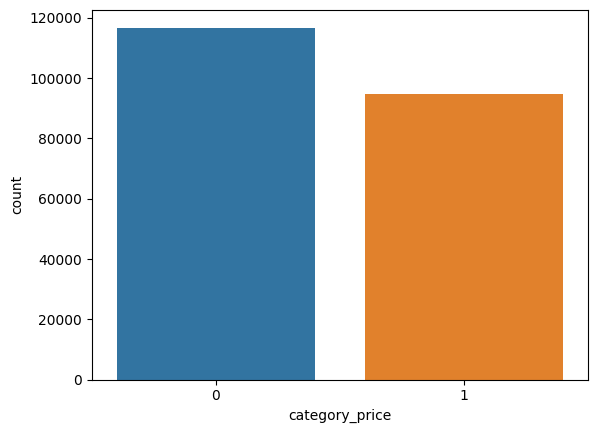

In [28]:
sns.countplot(x='category_price', data=df_sinull) 
plt.show()
## Podemos verificar que nuestra variable objetivo se encuentra balanceada

### vamos a realizar un mapa de correlaciones para mirar las distribuciones de las variables

In [29]:
## Creamos una funcion para realizar correlaciones 
def plot_corre_heatmap(df_corr):
    # Quitamos el triangulo superior para facilitar la lectura
    df_corr = df_corr.corr()
    matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool_)
    df_corr = df_corr.where(matrix)

    # Utilizamos el heatmap de seaborn para visualizar
    sns.heatmap(df_corr, cmap=sns.diverging_palette(90, 20, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

### graficamos el dataset sin nulos

C:\Users\crist\AppData\Local\Temp\ipykernel_3400\766595589.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_corr.corr()


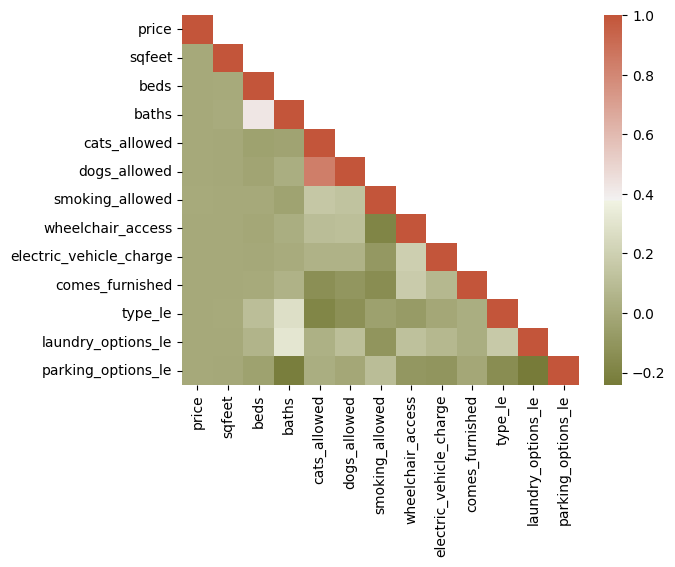

In [30]:
plot_corre_heatmap(df_sinull)

### Hacemos un nuevo dataset con las variable que tienen correlacion

In [48]:
df_corr_sinull = df_sinull[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le','category_price']]

C:\Users\crist\AppData\Local\Temp\ipykernel_3400\766595589.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_corr.corr()


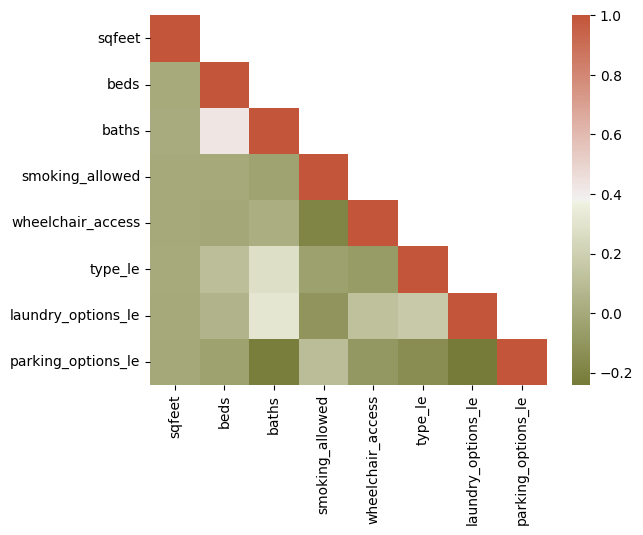

In [32]:
## graficamos una ves mas para mirar un poco mas al detalle
plot_corre_heatmap(df_corr_sinull)

### instanciamos nuestras variables X, y para iniciar con el entrenamiento

In [49]:
X = df_corr_sinull[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le']]
y = df_corr_sinull['category_price']

#### Hacemos validacion cruzada, con modelo Arboles de decicion 

In [34]:
## importamos nuestra libreria para el modelo arboles de decicion
from sklearn.tree import DecisionTreeClassifier
## Importamos libreria para validacion cruzada 
from sklearn.model_selection import cross_val_score
## Instanciamos nuestra libreria
arbol = DecisionTreeClassifier()
## Realizamos nuestra validacion 
arbol_puntaje = cross_val_score(arbol, X, y, cv=5)
## Miramos las puntuaciones
print(arbol_puntaje)

[0.84836521 0.84756141 0.84507908 0.84550462 0.84864533]


### Ahora lo miramos con k-vecinos

In [35]:
## Importamos nuestro modelo
from sklearn.neighbors import KNeighborsClassifier
## Instanciamos nuestro modelo k-vecinos
knn = KNeighborsClassifier(n_neighbors=1)
##Realizamos validacion cruzada
knn_puntaje = cross_val_score(knn, X, y, cv=5)
## miramos nuestros puntajes
print(knn_puntaje)

KeyboardInterrupt: 

### lo intentamos con cross_validate

In [ ]:
from sklearn.model_selection import cross_validate
arbol2_puntaje = cross_validate(arbol, X, y, cv=5, scoring = ['precision','recall'])
knn_puntaje = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])
print(arbol2_puntaje)
print(knn_puntaje)

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packa

{'fit_time': array([1.23796916, 0.82999706, 1.07400036, 1.16000414, 1.04599857]), 'score_time': array([0.40507245, 0.30599809, 0.38400126, 0.54599977, 0.29505157]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan])}
{'fit_time': array([1.95615125, 1.49852395, 1.7315855 , 1.54065657, 1.49518228]), 'score_time': array([27.99125791, 28.8425293 , 24.71443105, 24.17370415, 24.07267022]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan])}


C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packa

### Voy hacer mi entrenamiento y voy a utilizar hiperparametros

In [ ]:
from IPython.display import clear_output
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

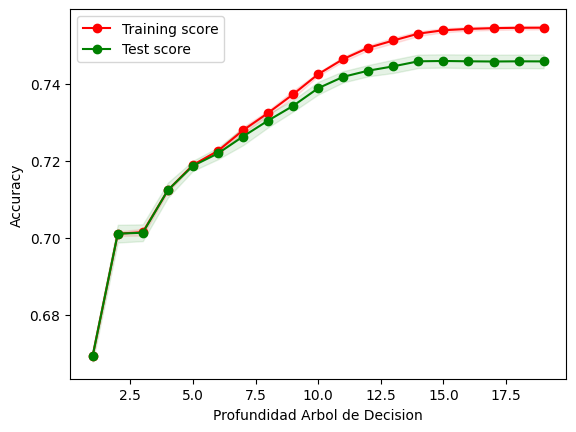

In [ ]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
clf = DecisionTreeClassifier(max_depth = 13, random_state = 42)
tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
clf.fit(X,y)
y_pred = clf.predict(X)
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.810831512950722


In [54]:
df_test = pd.read_parquet('./test.parquet')

In [55]:
def data_test(df_test):
    df_test.drop(['url','region_url','image_url'], axis=1, inplace=True)
    df_test.drop(['region','state'], axis=1, inplace=True)
    df_test.drop(['description'], axis=1, inplace=True)
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df_test['type_le'] = le.fit_transform(df_test['type'])
    df_test['laundry_options_le'] = le.fit_transform(df_test['laundry_options'])
    df_test['parking_options_le'] = le.fit_transform(df_test['parking_options'])
    df_test.drop(['id','type','laundry_options','parking_options'], axis=1, inplace=True)
    df_test.drop(['lat','long'], axis=1, inplace=True)
    df_test = df_test[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le']]
    
    return df_test

In [56]:
df_test = data_test(df_test)
test_pred = clf.predict(df_test)
pred_csv = pd.DataFrame(test_pred)
pred_csv.to_csv('Alemax019.csv', index=False)